In [1]:
from wordcloud import ImageColorGenerator, WordCloud, STOPWORDS
import nltk
from konlpy.tag import Okt
from PIL import Image
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('static/data/melon_song_morphs.csv')

In [3]:
df = df[['songId', 'genre', 'lyric']]
df.head()

,songId,genre,lyric
0,418168,발라드 국내영화,햇살은 우릴 위해 내리고\n바람도 서롤 감싸게 했죠\n우리 웃음속에 계절은 오고\n...
1,35609035,발라드 국내영화,하나만 알고 둘은\n잘 모르는 사람입니다\n하루는 비틀거리고\n하루는 뒤뚱거리고\n...
2,1046278,발라드 국내영화,서쪽하늘로 노을은 지고\n이젠 슬픔이 돼버린 그대를\n다시 부를수 없을 것 같아\n...
3,35609034,발라드 국내영화,누군가를 다시 만난다면\n여전히 나는 너를\n누군가를 다시 사랑하면\n영원히 나는 ...
4,35728845,록/메탈 국내영화,말해야 하는데 네 앞에 서면\n아무 말 못 하는 내가 미워져\n용기를 내야 해 후회...


In [4]:
df.fillna('', inplace=True)
df.isna().sum()

songId    0
genre     0
lyric     0
dtype: int64

- 발라드+발라드/국내드라마
- 댄스
- R&B/Soul
- 랩/힙합
- 국내뮤지컬
- 성인가요/트로트
- 록/메탈
- 포크/블루스

In [5]:
ballade = df[(df.genre == '발라드 국내드라마') | (df.genre == '발라드')]

In [6]:
sw_wc = STOPWORDS
a = ' '.join(ballade.lyric.values.tolist()).replace('\n', ' ').split()
filtered_list = [word for word in a if len(word) > 1]

In [7]:
stoptext = """
    그대 내가 너를 나를 다시 나의 너의 우리 나는 없는 내게 그댈 니가 이렇게 네가 없어 있어 있는 거야 같아 싶어 너무 사람 이젠 모든
"""
stop_words = stoptext.split()
stop_words[:5]

['그대', '내가', '너를', '나를', '다시']

In [8]:
stop_words.extend(sw_wc)
stop_words

['그대',
 '내가',
 '너를',
 '나를',
 '다시',
 '나의',
 '너의',
 '우리',
 '나는',
 '없는',
 '내게',
 '그댈',
 '니가',
 '이렇게',
 '네가',
 '없어',
 '있어',
 '있는',
 '거야',
 '같아',
 '싶어',
 '너무',
 '사람',
 '이젠',
 '모든',
 'off',
 'down',
 'further',
 'has',
 'yourself',
 'what',
 "i'm",
 'ought',
 "he's",
 "they'd",
 "wouldn't",
 'cannot',
 'those',
 'out',
 'only',
 'all',
 'more',
 'to',
 'we',
 'a',
 'until',
 'it',
 'hers',
 "she'd",
 'yours',
 'our',
 "we'll",
 'few',
 'her',
 "let's",
 'not',
 'since',
 "we'd",
 'with',
 "didn't",
 'have',
 'are',
 'just',
 'about',
 'otherwise',
 'which',
 'however',
 'would',
 "you'll",
 'here',
 "he'll",
 'such',
 'once',
 'ever',
 'this',
 'by',
 'over',
 'these',
 'other',
 'she',
 'www',
 'do',
 "aren't",
 'him',
 "he'd",
 'of',
 'any',
 'for',
 "i'll",
 'very',
 "won't",
 'be',
 'their',
 'he',
 "weren't",
 'like',
 'no',
 'am',
 'themselves',
 "shan't",
 'where',
 'ours',
 'through',
 'if',
 'also',
 'and',
 'can',
 'his',
 'while',
 "you've",
 'during',
 'my',
 "they're",
 'were',


In [9]:
b = [word for word in filtered_list if word not in stop_words]

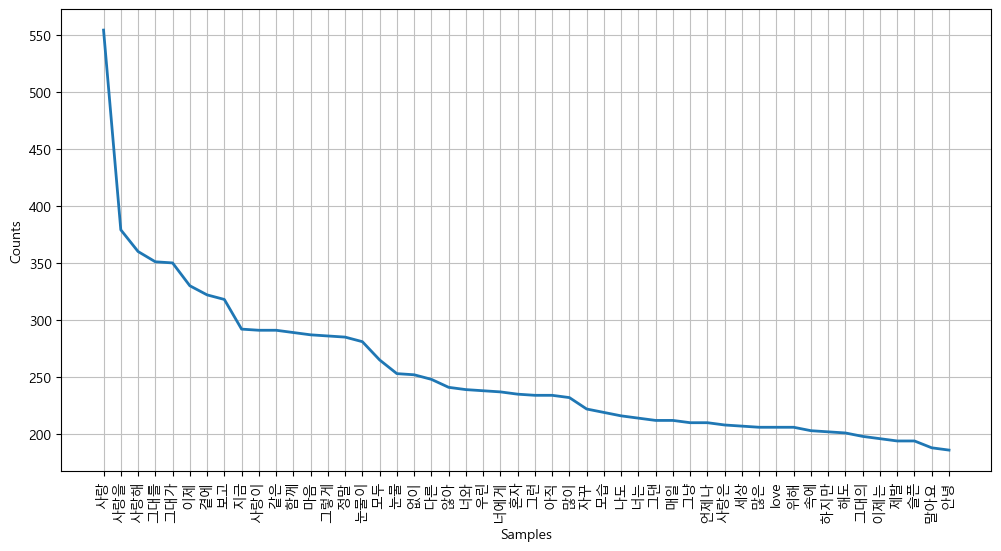

In [10]:
gift = nltk.Text(b, name='발라드')
plt.figure(figsize=(12,6))
gift.plot(50);

In [14]:
import random
def color_func(word, font_size, position, orientation, random_state=2023, **kwargs):
    colors = ['#e98d6b', '#e3685c', '#d14a61', '#b13c6c', '#8f3371', '#6c2b6d']
    return random.choice(colors)

import seaborn as sns
print(sns.color_palette("flare").as_hex())

['#e98d6b', '#e3685c', '#d14a61', '#b13c6c', '#8f3371', '#6c2b6d']


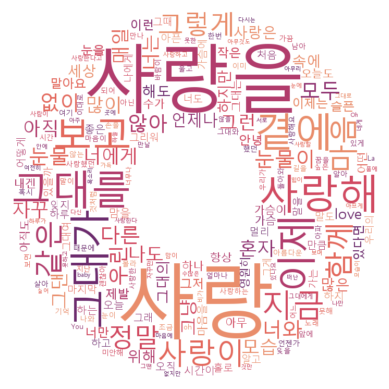

In [15]:
mask = np.array(Image.open('static/img/donut/도넛j.jpg'))
image_colors = ImageColorGenerator(mask)

wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, mask=mask,
    color_func=color_func
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

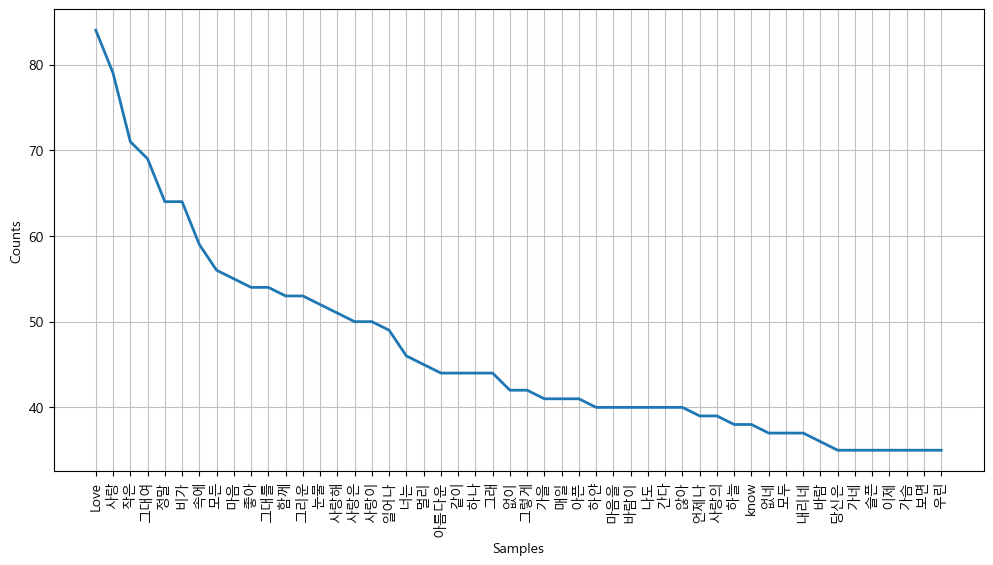

In [43]:
dance = df[df.genre == '포크/블루스']
a = ' '.join(dance.lyric.values.tolist()).replace('\n', ' ').split()
filtered_list = [word for word in a if len(word) > 1]
stoptext = """
    그대 내가 너를 나를 다시 나의 너의 우리 나는 없는 내게 그댈 니가 이렇게 네가 없어 있어 있는 거야 같아 싶어 너무 사람 이젠
    oh Oh uh la eh La yeah Im na Ah
"""
stop_words = stoptext.split()
stop_words.extend(sw_wc)
b = [word for word in filtered_list if word not in stop_words]
gift = nltk.Text(b, name='댄스')
plt.figure(figsize=(12,6))
gift.plot(50);

In [48]:
import random
def color_func(word, font_size, position, orientation, random_state=2023, **kwargs):
    colors = ['#4b8264', '#3b5d4a', '#2b3831', '#412e45', '#75427e', '#a956b7']
    return random.choice(colors)

import seaborn as sns
print(sns.diverging_palette(145, 300, s=60, center="dark").as_hex())

['#4b8264', '#3b5d4a', '#2b3831', '#412e45', '#75427e', '#a956b7']


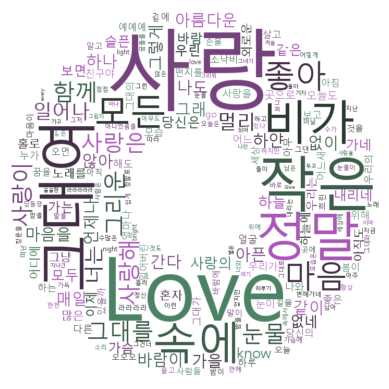

In [49]:
mask = np.array(Image.open('static/img/donut/도넛j.jpg'))
image_colors = ImageColorGenerator(mask)

wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, mask=mask,
    color_func=color_func
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

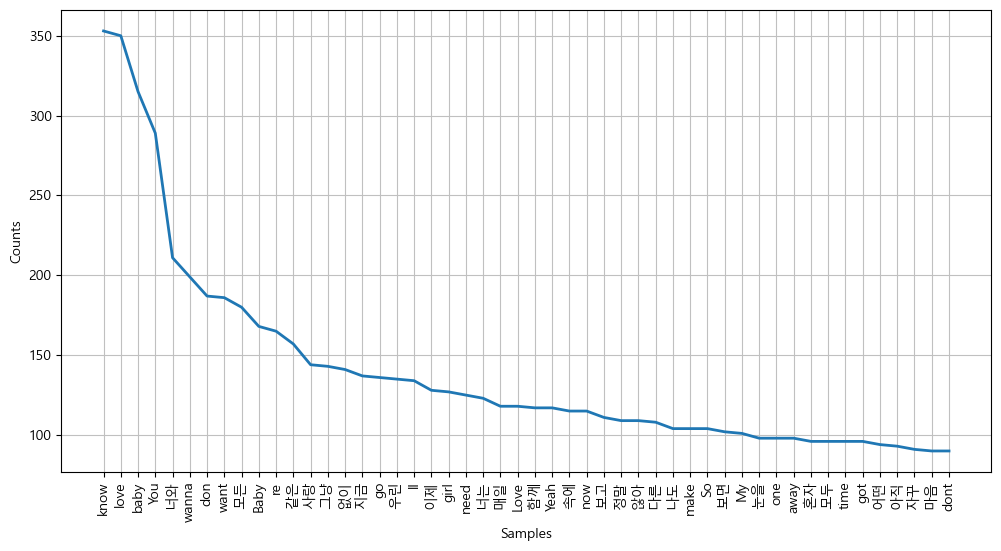

In [19]:
RnBSoul = df[df.genre == 'R&B/Soul']
a = ' '.join(RnBSoul.lyric.values.tolist()).replace('\n', ' ').split()
filtered_list = [word for word in a if len(word) > 1]
stoptext = """
    그대 내가 너를 나를 다시 나의 너의 우리 나는 없는 내게 그댈 니가 이렇게 네가 없어 있어 있는 거야 같아 싶어 너무 사람 이젠
    oh Oh uh la eh La yeah Im na Ah
"""
stop_words = stoptext.split()
stop_words.extend(sw_wc)
b = [word for word in filtered_list if word not in stop_words]
gift = nltk.Text(b, name='R&B/Soul')
plt.figure(figsize=(12,6))
gift.plot(50);

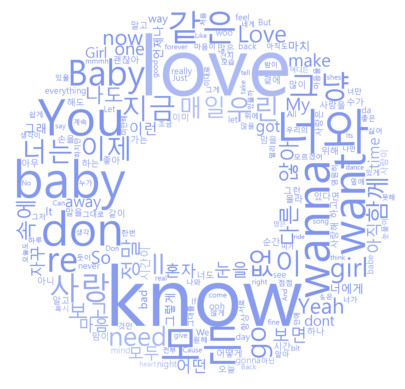

In [21]:
mask = np.array(Image.open('static/img/donut/도넛6.jpg'))
image_colors = ImageColorGenerator(mask)

wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, mask=mask, stopwords=sw_wc
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off');

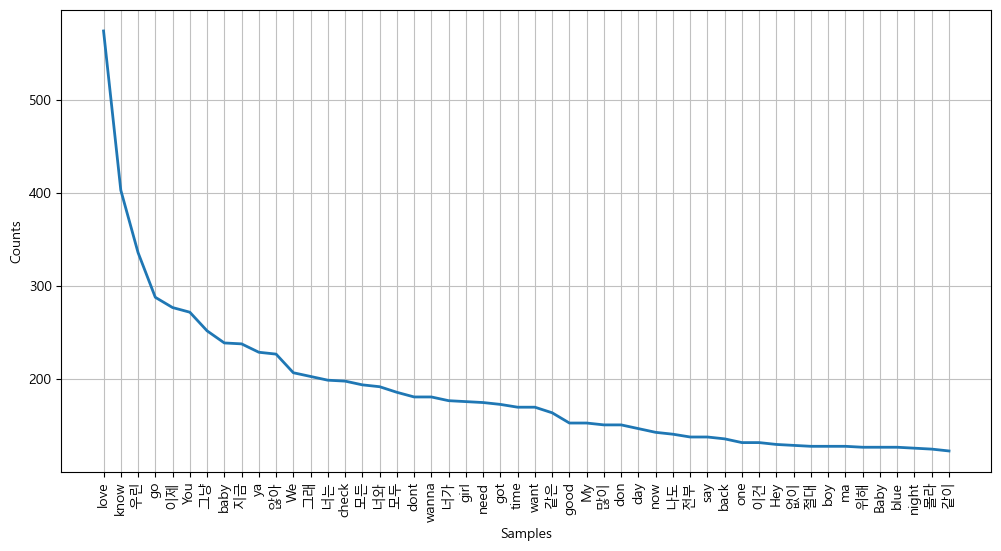

In [22]:
rap = df[df.genre == '랩/힙합']
a = ' '.join(rap.lyric.values.tolist()).replace('\n', ' ').split()
filtered_list = [word for word in a if len(word) > 1]
stoptext = """
    그대 내가 너를 나를 다시 나의 너의 우리 나는 없는 내게 그댈 니가 이렇게 네가 없어 있어 있는 거야 같아 싶어 너무 사람 이젠
    oh Oh uh la eh La yeah Im na Ah
"""
stop_words = stoptext.split()
stop_words.extend(sw_wc)
b = [word for word in filtered_list if word not in stop_words]
gift = nltk.Text(b, name='랩/힙합')
plt.figure(figsize=(12,6))
gift.plot(50);

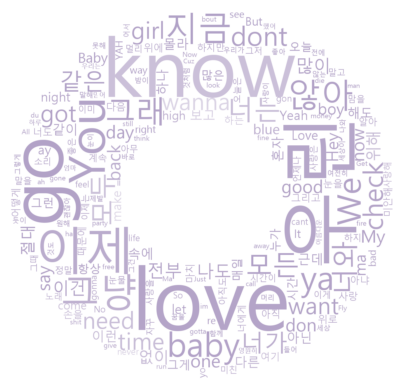

In [25]:
mask = np.array(Image.open('static/img/donut/도넛5.jpg'))
image_colors = ImageColorGenerator(mask)

wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, mask=mask, stopwords=sw_wc
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off');

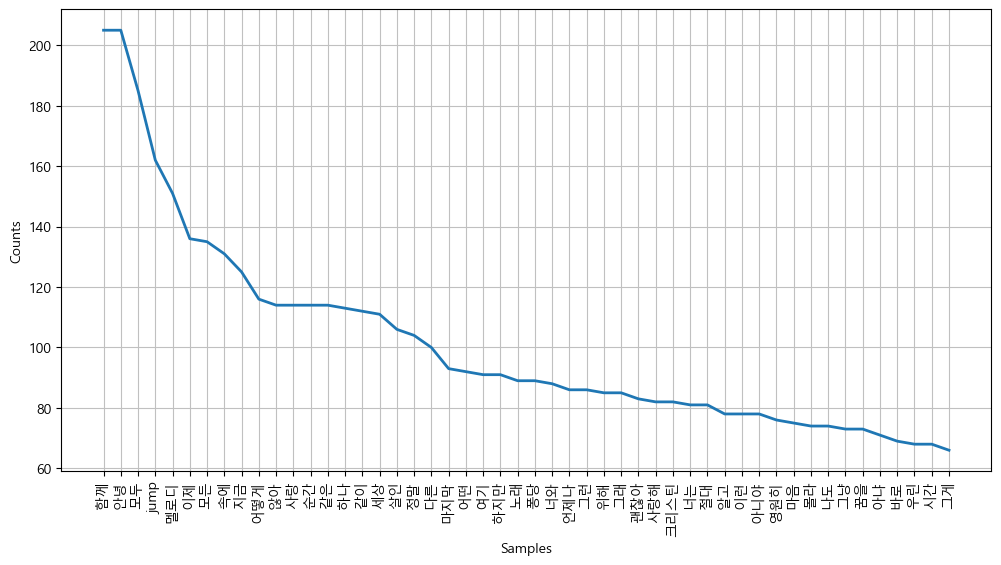

In [26]:
musical = df[df.genre == '국내뮤지컬']
a = ' '.join(musical.lyric.values.tolist()).replace('\n', ' ').split()
filtered_list = [word for word in a if len(word) > 1]
stoptext = """
    그대 내가 너를 나를 다시 나의 너의 우리 나는 없는 내게 그댈 니가 이렇게 네가 없어 있어 있는 거야 같아 싶어 너무 사람 이젠
    oh Oh uh la eh La yeah Im na Ah
"""
stop_words = stoptext.split()
stop_words.extend(sw_wc)
b = [word for word in filtered_list if word not in stop_words]
gift = nltk.Text(b, name='국내뮤지컬')
plt.figure(figsize=(12,6))
gift.plot(50);

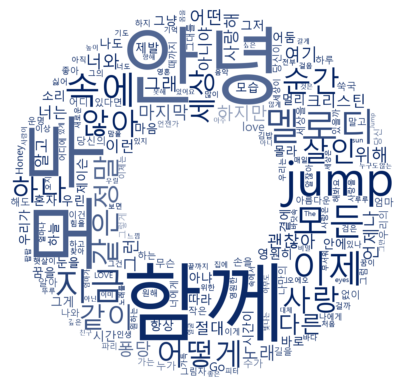

In [27]:
mask = np.array(Image.open('static/img/donut/도넛8.jpg'))
image_colors = ImageColorGenerator(mask)

wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, mask=mask, stopwords=sw_wc
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off');

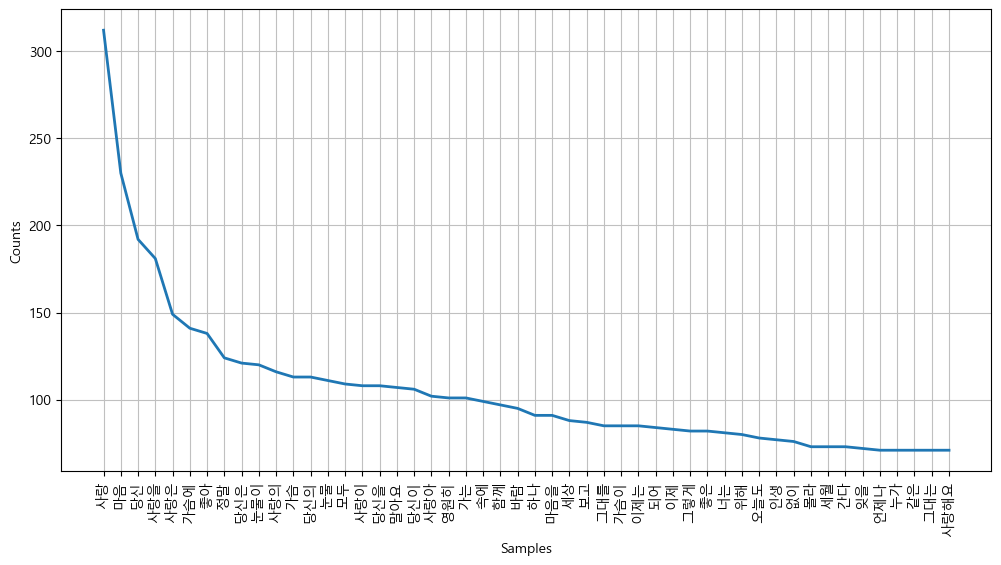

In [28]:
trot = df[df.genre == '성인가요/트로트']
a = ' '.join(trot.lyric.values.tolist()).replace('\n', ' ').split()
filtered_list = [word for word in a if len(word) > 1]
stoptext = """
    그대 내가 너를 나를 다시 나의 너의 우리 나는 없는 내게 그댈 니가 이렇게 네가 없어 있어 있는 거야 같아 싶어 너무 사람 이젠
    oh Oh uh la eh La yeah Im na Ah
"""
stop_words = stoptext.split()
stop_words.extend(sw_wc)
b = [word for word in filtered_list if word not in stop_words]
gift = nltk.Text(b, name='성인가요/트로트')
plt.figure(figsize=(12,6))
gift.plot(50);

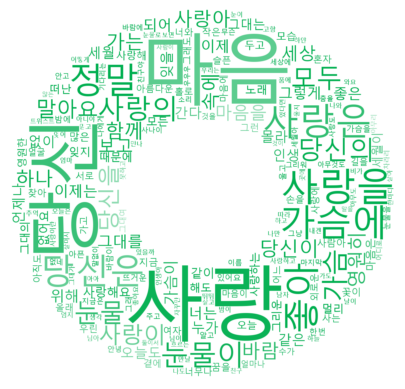

In [30]:
mask = np.array(Image.open('static/img/donut/도넛9.jpg'))
image_colors = ImageColorGenerator(mask)

wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, mask=mask, stopwords=sw_wc
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off');

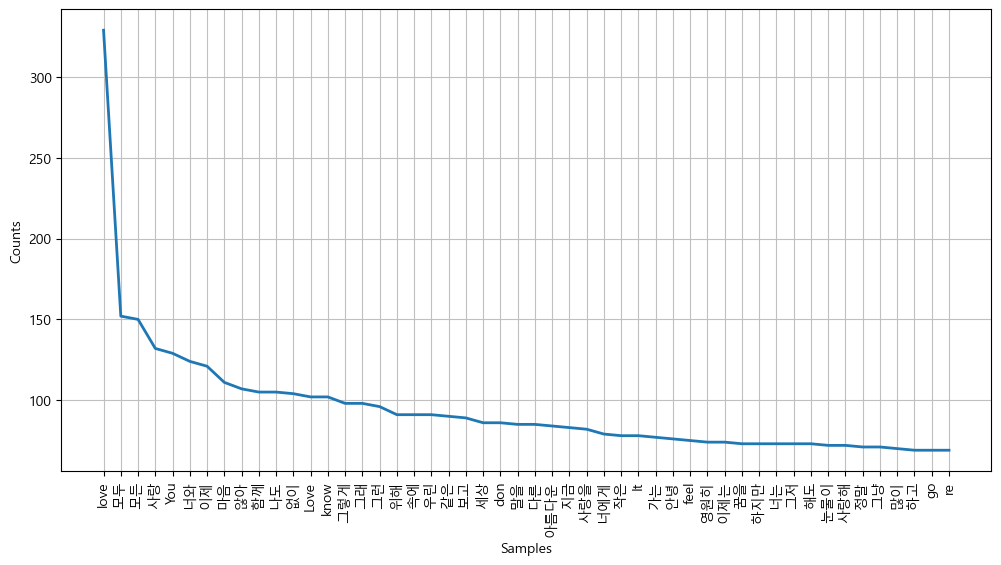

In [38]:
rock = df[df.genre == '록/메탈']
a = ' '.join(rock.lyric.values.tolist()).replace('\n', ' ').split()
filtered_list = [word for word in a if len(word) > 1]
stoptext = """
    그대 내가 너를 나를 다시 나의 너의 우리 나는 없는 내게 그댈 니가 이렇게 네가 없어 있어 있는 거야 같아 싶어 너무 사람 이젠
    oh Oh uh la eh La yeah Im na Ah
"""
stop_words = stoptext.split()
stop_words.extend(sw_wc)
b = [word for word in filtered_list if word not in stop_words]
gift = nltk.Text(b, name='록/메탈')
plt.figure(figsize=(12,6))
gift.plot(50);

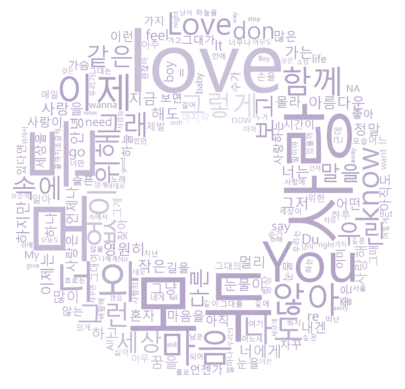

In [39]:
mask = np.array(Image.open('static/img/donut/도넛5.jpg'))
image_colors = ImageColorGenerator(mask)

wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, mask=mask, stopwords=sw_wc
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off');

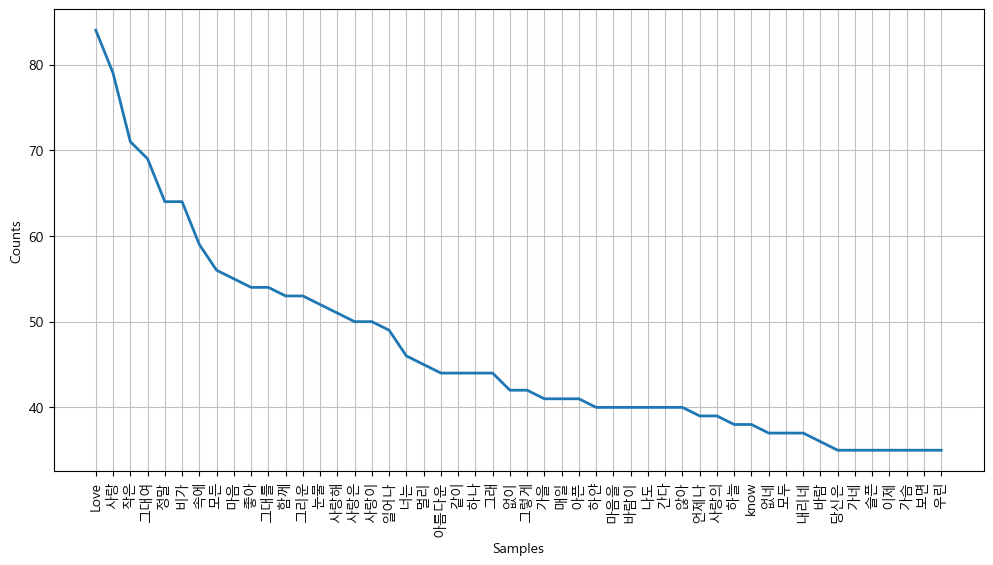

In [34]:
folk = df[df.genre == '포크/블루스']
a = ' '.join(folk.lyric.values.tolist()).replace('\n', ' ').split()
filtered_list = [word for word in a if len(word) > 1]
stoptext = """
    그대 내가 너를 나를 다시 나의 너의 우리 나는 없는 내게 그댈 니가 이렇게 네가 없어 있어 있는 거야 같아 싶어 너무 사람 이젠
    oh Oh uh la eh La yeah Im na Ah
"""
stop_words = stoptext.split()
stop_words.extend(sw_wc)
b = [word for word in filtered_list if word not in stop_words]
gift = nltk.Text(b, name='포크/블루스')
plt.figure(figsize=(12,6))
gift.plot(50);

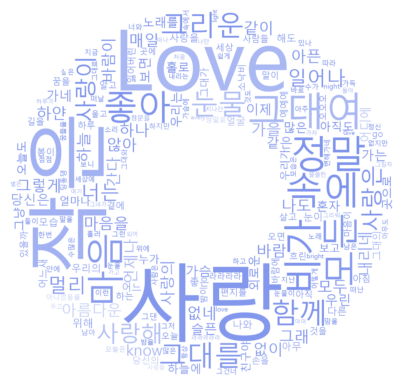

In [37]:
mask = np.array(Image.open('static/img/donut/도넛6.jpg'))
image_colors = ImageColorGenerator(mask)

wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, mask=mask, stopwords=sw_wc
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off');